In [25]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df=pd.read_csv(r'C:\Users\liewm\Documents\BT4240 Machine Learning\Project\donorsnlp1.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

C:\Users\liewm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,Combined Project Essay,essay_processed,need_processed
0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Counter({'Music & The Arts': 1, 'Health & Spor...","Counter({'Performing Arts': 1, 'Team Sports': 1})",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Our elementary school is a culturally rich sch...,elementary school rich school diverse populati...,student need matching shirt wear dance perform...
1,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Counter({'Applied Learning': 1, 'Literacy & La...","Counter({'Character Education': 1, 'Literature...",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My kids tell me each day that they want to mak...,kid tell day want make happy teacher respectfu...,student need tablet order communicate virtual ...
2,p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Counter({'Math & Science': 1}),Counter({'Mathematics': 1}),Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My seventh graders dream big. They can't wait ...,seventh grader dream big wait college dream co...,student need seat allow fidgety move learn cha...
3,p030093,b9e731e16ad8669f37a43e5316518106,Teacher,VA,2017-03-09 17:16:13,Grades PreK-2,"Counter({'Literacy & Language': 1, 'Math & Sci...","Counter({'Literature & Writing': 1, 'Mathemati...","Writing, Writing, Writing!",My classroom has 24 students in it. We have an...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,My classroom has 24 students in it. We have an...,classroom student amazing group kid love learn...,student need individual dry erase board show w...
4,p225747,4681d60136ea859084ab488f2254b219,Ms.,PA,2016-12-08 13:25:03,Grades 3-5,"Counter({'Applied Learning': 1, 'Literacy & La...","Counter({'Character Education': 1, 'Literacy':...",Life Lessons through Literacy,"My school is located in a high poverty area, j...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"My school is located in a high poverty area, j...",school locate high poverty area major city % s...,student need book teach life lesson promote di...


In [27]:
df.shape

(93791, 77)

In [28]:
essay=df['essay_processed'].values.tolist()
score=df['project_is_approved'].values.tolist()
need=df['need_processed'].values.tolist()

In [29]:
#loading required data to dataframe.
text_df = pd.DataFrame()
text_df['essay'] = essay
text_df['need']=need
text_df['score'] = score
text_df.head()

,essay,need,score
0,elementary school rich school diverse populati...,student need matching shirt wear dance perform...,0.0
1,kid tell day want make happy teacher respectfu...,student need tablet order communicate virtual ...,1.0
2,seventh grader dream big wait college dream co...,student need seat allow fidgety move learn cha...,1.0
3,classroom student amazing group kid love learn...,student need individual dry erase board show w...,1.0
4,school locate high poverty area major city % s...,student need book teach life lesson promote di...,1.0


In [30]:
#Convert score to integer
text_df['score']=pd.to_numeric(text_df['score'], downcast='integer')

In [31]:
text_df.head()

,essay,need,score
0,elementary school rich school diverse populati...,student need matching shirt wear dance perform...,0
1,kid tell day want make happy teacher respectfu...,student need tablet order communicate virtual ...,1
2,seventh grader dream big wait college dream co...,student need seat allow fidgety move learn cha...,1
3,classroom student amazing group kid love learn...,student need individual dry erase board show w...,1
4,school locate high poverty area major city % s...,student need book teach life lesson promote di...,1


In [32]:
len(text_df)

93791

### Replace missing values in essay and need statement 

In [33]:
text_df.isnull().sum()

essay    6
need     6
score    0
dtype: int64

In [34]:
import numpy as np
text_df = text_df.replace(np.nan, '', regex=True)

In [35]:
text_df.isnull().sum()

essay    0
need     0
score    0
dtype: int64

## 1. Split datasets

In [32]:
x=text_df.loc[:,['essay', 'need']]
y=text_df.score

In [33]:
from sklearn.model_selection import train_test_split
SEED = 1
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=0.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=0.2, random_state=SEED)

In [34]:
print("Train: {}, Validation: {}, Test: {}".format(x_train.shape, x_validation.shape, x_test.shape))

Train: (75032, 2), Validation: (15007, 2), Test: (3752, 2)


In [42]:
x_train['essay']

26413    obstacle student face daily mind boggle major ...
55647    student array character sweet kid successful s...
78573    student live poor area new york city class 4th...
5420     first grader wonderful kid live high poverty a...
44212    student live south memphis\r\nalmost student l...
                               ...                        
21440    student learn variety way hand game activity g...
73349    teach kindergarten title school north carolina...
50057    student 21st century learner eager use technol...
5192     year teach sixth grade language art end year w...
77708    classroom dual language classroom majority stu...
Name: essay, Length: 75032, dtype: object

## 2. Check which feature extraction is better? 
1) Count vectorizer : unigram, bigram, trigram 
<br>2) TFIDF vectorizer with unigram, bigram, trigram 

## 2.1 Project Essays 
### 2.1.1 Logistic Regression 

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [36]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [37]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train['essay'], y_train, x_validation['essay'], y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2)) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3)) #Trigram 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 23.61s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.71%
model is 0.03% less accurate than null accuracy
train and test time: 23.95s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.04% less accurate than null accuracy
train and test time: 23.87s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 25.04s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 23.68s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.04% less accurate than null accuracy
train and test time: 23.74s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 23.90s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 23.77s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 24.47s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.70%
model is 0.05% less accurate than null accuracy
train and test time: 24.12s
--------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.75%
model is 0.01% more accurate than null accuracy
train and test time: 58.51s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 58.91s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.74%
model is 0.01% less accurate than null accuracy
train and test time: 60.39s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.74%
model is 0.01% less accurate than null accuracy
train and test time: 60.95s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 62.40s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 61.57s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 60.23s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 60.78s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 62.56s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 64.72s
--------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.74%
model has the same accuracy with the null accuracy
train and test time: 132.32s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.73%
model is 0.01% less accurate than null accuracy
train and test time: 141.77s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 132.85s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.73%
model is 0.01% less accurate than null accuracy
train and test time: 132.90s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 132.53s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 132.71s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 132.12s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 131.25s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 136.75s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 90.72%
model is 0.03% less accurate than null accuracy
train and test time: 154.13s
--------------------------------------------------------------------------------


In [47]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2)) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3)) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 89.25%
model is 1.50% less accurate than null accuracy
train and test time: 80.57s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.09%
model is 1.65% less accurate than null accuracy
train and test time: 117.55s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.14%
model is 1.61% less accurate than null accuracy
train and test time: 119.97s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.16%
model is 1.59% less accurate than null accuracy
train and test time: 128.07s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.21%
model is 1.53% less accurate than null accuracy
train and test time: 117.64s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.21%
model is 1.53% less accurate than null accuracy
train and test time: 119.80s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.27%
model is 1.48% less accurate than null accuracy
train and test time: 118.99s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.27%
model is 1.48% less accurate than null accuracy
train and test time: 120.67s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.27%
model is 1.48% less accurate than null accuracy
train and test time: 120.88s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 90.74%
accuracy score: 89.27%
model is 1.48% less accurate than null accuracy
train and test time: 120.77s
--------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 88.03%
model is 2.71% less accurate than null accuracy
train and test time: 92.69s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 85.97%
model is 4.78% less accurate than null accuracy
train and test time: 126.45s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 86.29%
model is 4.46% less accurate than null accuracy
train and test time: 136.32s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 86.91%
model is 3.83% less accurate than null accuracy
train and test time: 144.63s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.23%
model is 3.51% less accurate than null accuracy
train and test time: 1982.13s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.53%
model is 3.21% less accurate than null accuracy
train and test time: 174.40s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.76%
model is 2.99% less accurate than null accuracy
train and test time: 188.05s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.87%
model is 2.88% less accurate than null accuracy
train and test time: 177.39s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 88.04%
model is 2.71% less accurate than null accuracy
train and test time: 151.97s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 88.16%
model is 2.59% less accurate than null accuracy
train and test time: 3452.56s
--------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.97%
model is 2.78% less accurate than null accuracy
train and test time: 110.24s
--------------------------------------------------------------------------------
Validation result for 20000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 85.77%
model is 4.98% less accurate than null accuracy
train and test time: 272.38s
--------------------------------------------------------------------------------
Validation result for 30000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 86.24%
model is 4.50% less accurate than null accuracy
train and test time: 252.63s
--------------------------------------------------------------------------------
Validation result for 40000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 86.84%
model is 3.90% less accurate than null accuracy
train and test time: 271.00s
--------------------------------------------------------------------------------
Validation result for 50000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.12%
model is 3.62% less accurate than null accuracy
train and test time: 274.06s
--------------------------------------------------------------------------------
Validation result for 60000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.43%
model is 3.31% less accurate than null accuracy
train and test time: 277.93s
--------------------------------------------------------------------------------
Validation result for 70000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.73%
model is 3.01% less accurate than null accuracy
train and test time: 261.58s
--------------------------------------------------------------------------------
Validation result for 80000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.99%
model is 2.76% less accurate than null accuracy
train and test time: 260.63s
--------------------------------------------------------------------------------
Validation result for 90000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 87.95%
model is 2.79% less accurate than null accuracy
train and test time: 227.14s
--------------------------------------------------------------------------------
Validation result for 100000 features


C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 90.74%
accuracy score: 88.11%
model is 2.64% less accurate than null accuracy
train and test time: 246.18s
--------------------------------------------------------------------------------


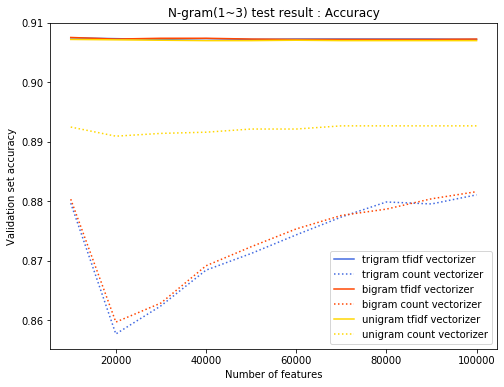

In [48]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### 2.1.2 Multinomial Naive Bayes 

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=nb) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=nb) #Trigram 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 90.74%
accuracy score: 90.73%
model is 0.01% less accurate than null accuracy
train and test time: 32.73s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 90.74%
accuracy score: 90.72%
model is 0.02% less accurate than null accuracy
train and test time: 21.73s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 90.74%
accuracy score: 90.74%
model has the same accuracy with the null accuracy
train and test time: 20.54s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 90.74%
accuracy score: 90.74%
model has the same accuracy with the null accuracy
train and test time: 21.10s
----------------------------------------------------------

In [ ]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=nb) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=nb) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 90.74%
accuracy score: 86.73%
model is 4.01% less accurate than null accuracy
train and test time: 35.35s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 90.74%
accuracy score: 87.11%
model is 3.64% less accurate than null accuracy
train and test time: 20.72s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 90.74%
accuracy score: 88.18%
model is 2.57% less accurate than null accuracy
train and test time: 19.27s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 90.74%
accuracy score: 89.09%
model is 1.66% less accurate than null accuracy
train and test time: 20.02s
----------------------------------------------------------------

In [ ]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### 2.1.3 SVM

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=sv) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=sv) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=sv) #Trigram 

In [ ]:
feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=sv) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=sv) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=sv) #Trigram

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

In [ ]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

## 3. Models 
### 3.1 Logistic Regression 
1) Since tf-idf trigram is the highest accuracy, this will be used for feature extraction 
<br>2) Perform tf-idf trigram on X datasets 
<br>3) SMOTE Sampling on tfidf vectors x datasets 

<br>4) Input (2) into Logistic Regression 
    - Grid Search to fine tune hyperparameters 
    - Use the best parameters for the logistic regression 
    - Perform k-fold cross validation on the datasets to train the dataset while performing logistic regression 
<br>5) Grid search is choose the best parameters for logistic regression, K-fold cross validation is to prevent overfitting on the model. The accuracy rate from the k-fold cross validation is taken from the mean of all accuracy rate. 

- Since there's no much difference in the accuracy between tf-idf unigram, bigram and trigram and the number of features, to save time, tfidf unigram is chosen as the feature extraction 

## Imbalanced dataset 
- We would like to see if imbalanced dataset can affect logistic regression accuracy 

## 3. SMOTE Sampling
### 3.1 Logistic Regression 
#### 3.1.1 TF-IDF (Unigram)
https://www.kaggle.com/ruzarx/oversampling-smote-and-adasyn


In [15]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [19]:
tvec = TfidfVectorizer()
testing_tfidf = tvec.fit_transform(text_df.essay)
testing_target=text_df.score
smt = SMOTE(random_state=40, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, testing_target)


MemoryError: 

In [20]:
smote_tfidf=pd.DataFrame(X_SMOTE[0:200].todense(), columns=tvec.get_feature_names())

In [36]:
smote_tfidf

,00,00am,00pm,01075rm,02,021,02810010orgtypecode,05a,0dh8q,0i,...,zuni,zusak,zwink,zydeco,zynergy,zzzz,zzzzzzzand,àll,سلام,ﬁtness
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def tfidf(col,ngrams = 1):

    df_temp = text_df.copy(deep = True)
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp[col])

    list_corpus = df_temp[col].tolist()
    list_labels = df_temp['score'].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

In [52]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing, metrics, model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    clf = LogisticRegressionCV(cv = folds, max_iter=10000,solver = 'lbfgs', multi_class = 'multinomial', n_jobs = -1)
    #Fit training dataset
    clf.fit(X_train_log, y_train_log)
    # Accuracy on validation dataset 
    model_lr = LogisticRegression(random_state=40, max_iter=10000, solver='lbfgs',multi_class='multinomial')
    validation_df = model_selection.cross_val_score(model_lr, X_train_log, y_train_log, cv=5)
    
    
    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    print(validation_df)
    print("Accuracy: %.5f%%" % (validation_df.mean()*100.0))
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

[0.78325975 0.83057395 0.83700052 0.83935536 0.83357863]
Accuracy: 82.47536%
Confusion matrix:
 [[  461  1284]
 [ 2445 14569]]


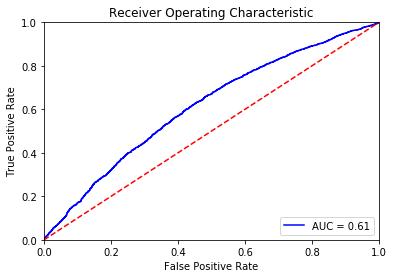

In [53]:
# DataFrame for result evaluation

smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing TF-IDF with 1-gram

X, y = tfidf('essay', ngrams = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_smote_train, y_smote_train = smote_over_sample.fit_resample(X_train, y_train)
smote_result = smote_result.append(training_logreg(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [54]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.764569,0.801215,0.779916,0.801215,0.997608


## Multinomial Naive Bayes 

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics, model_selection
params = {}
def training_NB(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, param_grid=params,cv=folds)
    
    clf.fit(X_train_log, y_train_log)
    
    validation_df=model_selection.cross_val_score(clf, X_train_log, y_train_log)
    
    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    print(validation_df)
    print("Accuracy: %.5f%%" % (validation_df.mean()*100.0))
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75939335 0.77780476 0.77941631]
Accuracy: 77.22048%
Confusion matrix:
 [[  802   943]
 [ 3383 13631]]


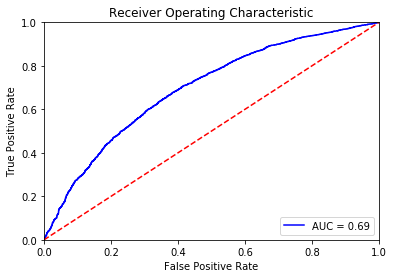

In [47]:
# DataFrame for result evaluation

nb_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 1-GRAM 
nb_result= nb_result.append(training_NB(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [48]:
nb_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Naive Bayes,0.724963,0.769391,0.730853,0.769391,0.813281


## Without k fold cross validation 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg_noK(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial', n_jobs = -1)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[  721  1024]
 [ 3115 13899]]


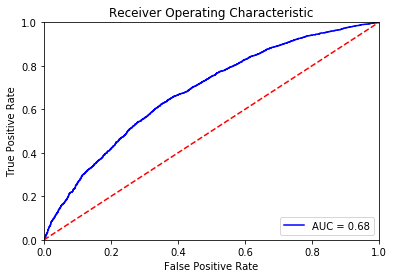

In [41]:
# DataFrame for result evaluation

result_noK = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 1-gram

result_noK= result_noK.append(training_logreg_noK(X_smote_train, X_test, y_smote_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)



In [43]:
result_noK

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 1-grams,Logistic Regression,0.734356,0.779359,0.745249,0.779359,0.861613


# 4 Downsampling 
## 4.1 Logistic Regression 
### 4.1.1 TF-IDF (unigram)


### Downsampling 
1) Split the dataset into training and testing dataset 
<br>2) Downsampling on training set 
<br>3) Test the model on testing dataset 

In [12]:
from sklearn.model_selection import train_test_split
X=text_df['essay']
y=text_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [14]:
ds=pd.concat([X_train, y_train], axis=1)

In [15]:
ds

,essay,score
52285,academic emotional social need student great a...,1
81952,middle school student come diverse neighborhoo...,1
88359,walk self contain classroom see student engage...,1
26863,tell 4th grader something fun want know fun fu...,0
50029,create compose music big goal music educator c...,1
...,...,...
56760,school low income school locate small town cal...,1
93176,teach fantastic group third grade student los ...,1
80037,school community learn center public school se...,1
30727,teach kindergarten similar herd cat teaching t...,1


In [16]:
#Balance the data using downsampling 
#From the above bar plot, we can tell that the number of projects being approved is way too significantly higher than non approved. 
#We can start by doing undersampling (removing class 1 labels from the data)
from sklearn.utils import resample
train_majority = ds[ds.score==0]
train_minority = ds[ds.score==1]
 
train_majority_downsampled = resample(train_majority, 
                                 replace=True,  
                                 n_samples=len(train_minority),   
                                 random_state=123)
train_ds = pd.concat([train_majority_downsampled, train_minority])
train_ds['score'].value_counts()

1    67947
0    67947
Name: score, dtype: int64

In [17]:
train_ds.head()

,essay,score
76476,typical classroom year old sit hour concentrat...,0
51659,heterogeneous class student suburban school mi...,0
3618,student diverse % population hispanic eager le...,0
35510,lucky first grade teacher grateful work empowe...,0
59473,student year old go kindergarten next year cla...,0


In [18]:
import numpy as np
train_ds = train_ds.replace(np.nan, '', regex=True)

In [20]:
X_train

52285    academic emotional social need student great a...
81952    middle school student come diverse neighborhoo...
88359    walk self contain classroom see student engage...
26863    tell 4th grader something fun want know fun fu...
50029    create compose music big goal music educator c...
                               ...                        
56760    school low income school locate small town cal...
93176    teach fantastic group third grade student los ...
80037    school community learn center public school se...
30727    teach kindergarten similar herd cat teaching t...
11590    student kid may struggle special need student ...
Name: essay, Length: 75032, dtype: object

In [23]:
#converting the data into numpy arrays
X_train_ds=train_ds.essay
y_train_ds=train_ds.score
#X_train_ds = np.array(train_ds.essay)
#y_train_ds = train_ds['score'].values

In [24]:
def tokenizer(text):
    return text.split()

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)



In [26]:
gs_lr_tfidf.fit(X_train_ds, y_train_ds)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 69.6min finished
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [27]:
gs_lr_tfidf.best_params_

{'clf__C': 10.0,
 'clf__penalty': 'l1',
 'vect__ngram_range': (1, 1),
 'vect__norm': None,
 'vect__stop_words': None,
 'vect__use_idf': False}

In [28]:
gs_lr_tfidf.best_score_

0.9251475414661428

In [29]:
clf = gs_lr_tfidf.best_estimator_
clf.score(X_test, y_test)

0.8092648861879631

Confusion matrix:
 [[  426  1319]
 [ 2259 14755]]


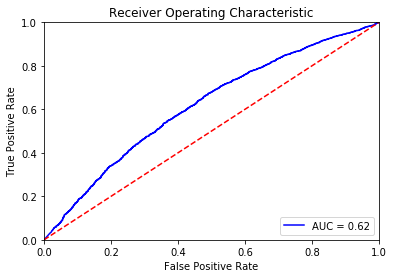

Precision : 91.79420181659823
Recall : 86.72269895380275
The accuracy is 80.93 %


In [30]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(X_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0] 
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

# Ignore the rest!!

# 3. Multinomial Naive Bayes
## 3.1 Essay
### 3.1.1 Unigram 

In [24]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

best_params = [] #store best parameters for MultinomialNB
parameters = {'alpha':[i for i in range(1,100,10)]} 
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(essay_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0



Confusion matrix:
 [[11484  4841]
 [ 4694 11922]]


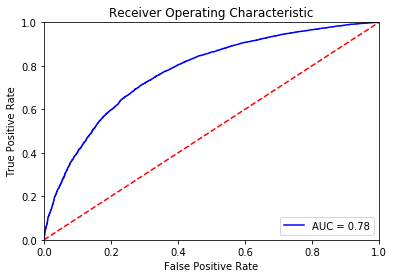

The log loss for the Naive bayes is: 1.1745085774738175


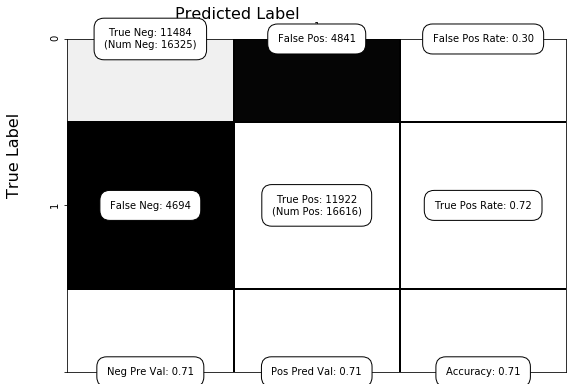

Precision : 71.12092107617968
Recall : 71.75012036591238
The accuracy is 71.05 %


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

### 3.1.2 Bi gram 

In [26]:
# Hyperparameter tuning for MultinomialNB with Bigrams
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(ngram_range=(1,2),max_features = i)
    data = vec.fit_transform(essay_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0


Confusion matrix:
 [[11282  5043]
 [ 5431 11185]]


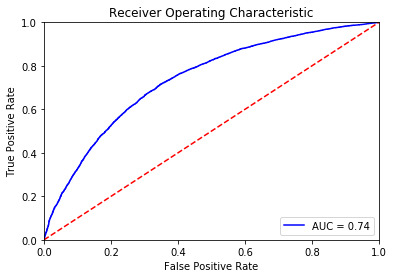

The log loss for the Naive bayes is: 1.9715995450899484


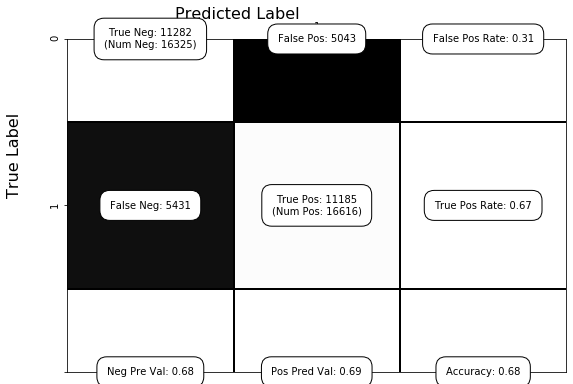

Precision : 68.92408183386739
Recall : 67.31463649494464
The accuracy is 68.2 %


In [27]:
# MultinomialNb with Bigrams
score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## 3.1.3 TF-IDF 

In [28]:
# Hyperparameter tuning for MultinomialNB with Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = TfidfVectorizer(max_features = i)
    data = vec.fit_transform(essay_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0


Confusion matrix:
 [[11677  4648]
 [ 4364 12252]]


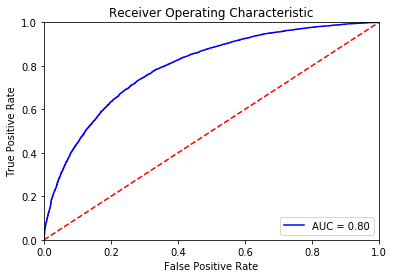

The log loss for the Naive bayes is: 0.5857384554019303


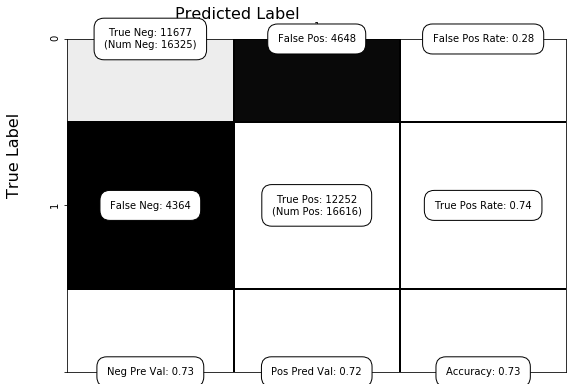

Precision : 72.49704142011835
Recall : 73.73615792007703
The accuracy is 72.64 %


In [29]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## 3.2 Project Need Statement 
### 3.2.1 Unigram

In [30]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

best_params = [] #store best parameters for MultinomialNB
parameters = {'alpha':[i for i in range(1,100,10)]} 
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(need_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0



Confusion matrix:
 [[11178  5147]
 [ 5206 11410]]


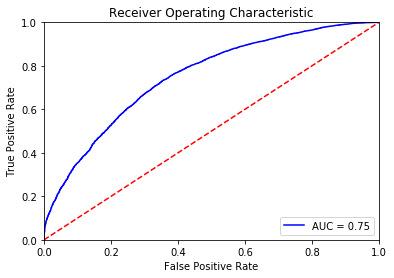

The log loss for the Naive bayes is: 0.6439826838905967


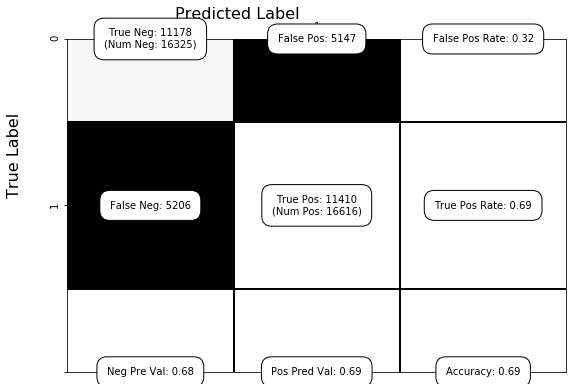

Precision : 68.91345050431842
Recall : 68.6687530091478
The accuracy is 68.57 %


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

### 3.2.2 Bi gram

In [32]:
# Hyperparameter tuning for MultinomialNB with Bigrams
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(ngram_range=(1,2),max_features = i)
    data = vec.fit_transform(need_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0


Confusion matrix:
 [[11092  5233]
 [ 4741 11875]]


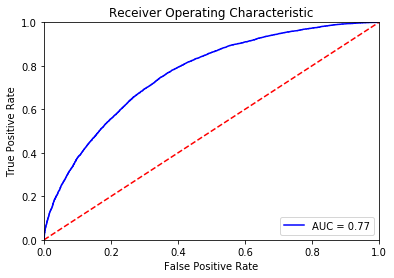

The log loss for the Naive bayes is: 0.8734151776730534


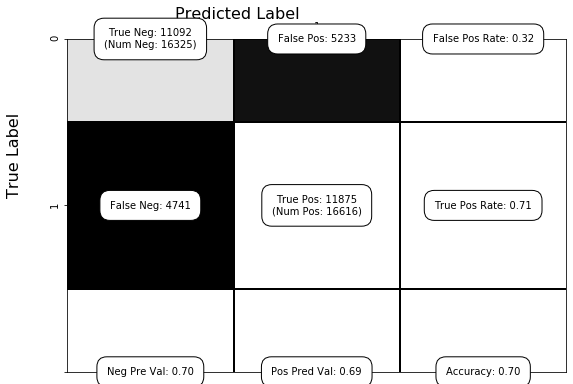

Precision : 69.41197100771569
Recall : 71.46726047183438
The accuracy is 69.72 %


In [33]:
# MultinomialNb with Bigrams
score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

### 3.2.3 TF-IDF

In [34]:
# Hyperparameter tuning for MultinomialNB with Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = TfidfVectorizer(max_features = i)
    data = vec.fit_transform(essay_ds)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score_ds, test_size=0.2, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0


Confusion matrix:
 [[11677  4648]
 [ 4364 12252]]


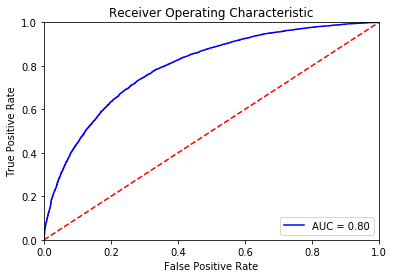

The log loss for the Naive bayes is: 0.5857384554019303


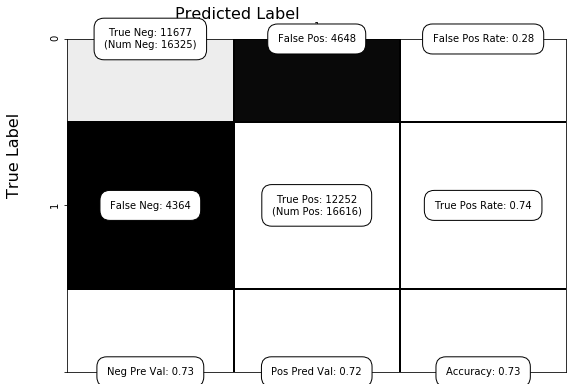

Precision : 72.49704142011835
Recall : 73.73615792007703
The accuracy is 72.64 %


In [35]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## 4.2 Project Need Statement 
### 4.2.1 TF-IDF 


In [26]:
X_train, X_test, y_train, y_test = train_test_split(need_ds, score_ds, test_size=0.2, random_state=42)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)



In [28]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.6min finished
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [29]:
gs_lr_tfidf.best_params_

{'clf__C': 100.0,
 'clf__penalty': 'l1',
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None}

In [30]:
gs_lr_tfidf.best_score_

0.7378662882036414

In [31]:
clf = gs_lr_tfidf.best_estimator_
clf.score(X_test, y_test)

0.7356789411371847

Confusion matrix:
 [[12646  3679]
 [ 5028 11588]]


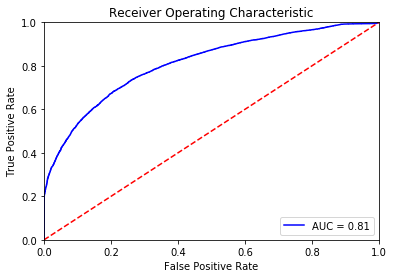

The log loss for the Naive bayes is: 0.5466069648284763


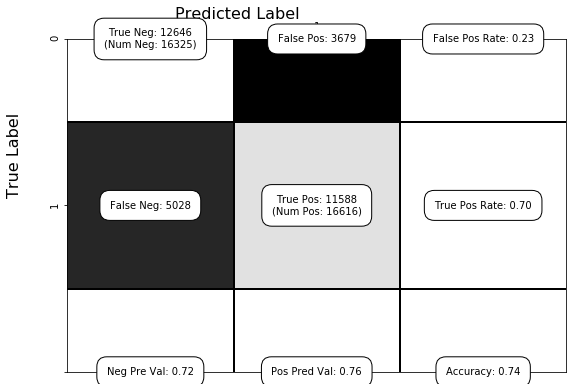

Precision : 75.90227287613807
Recall : 69.74000962927299
The accuracy is 73.57 %


In [32]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(X_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

In [33]:
len(X_test)

32941

## SVM
### Essay 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(essay_ds, score_ds, test_size=0.2, random_state=42)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
             ]

svm_tfidf = Pipeline([('vect', tfidf),
                     ('clf', svm.SVC(kernel='linear'))])

gs_svm_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)



In [38]:
gs_svm_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 633.9min finished
C:\Users\liewm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [39]:
gs_svm_tfidf.best_params_

{'clf__C': 10.0,
 'clf__penalty': 'l1',
 'vect__ngram_range': (1, 1),
 'vect__norm': None,
 'vect__stop_words': None,
 'vect__use_idf': False}

In [40]:
gs_svm_tfidf.best_score_

0.9108916902573599

In [41]:
clf = gs_svm_tfidf.best_estimator_
clf.score(X_test, y_test)

0.9187031359096567

Confusion matrix:
 [[16271    54]
 [ 2624 13992]]


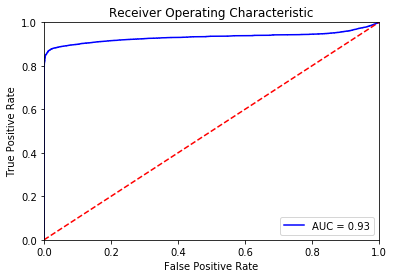

The log loss for the SVM is: 0.4152987979427027


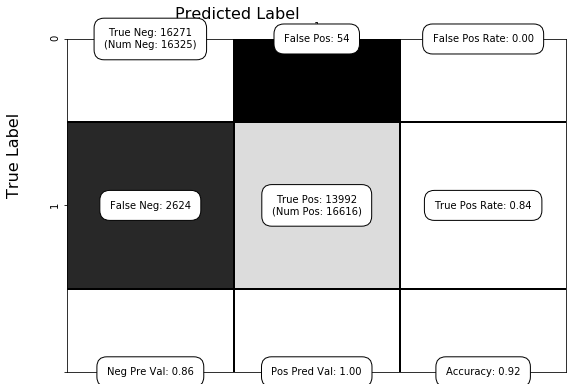

Precision : 99.61554891072191
Recall : 84.20799229658161
The accuracy is 91.87 %


In [42]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(X_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the SVM is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB)

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## 2.2 Project Resource Summary 
### 2.2.1 Logistic Regression 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train['need'], y_train, x_validation['need'], y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2)) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3)) #Trigram 

feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2)) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=ctvec,ngram_range=(1, 3)) #Trigram 

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### 2.2.2 Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=nb) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=nb) #Trigram 

feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=nb) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=nb) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=nb) #Trigram 

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()



### 2.2.3 SVM

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec, classifier=sv) #Unigram
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2), classifier=sv) #Bigram
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3), classifier=sv) #Trigram 

feature_result_ug = nfeature_accuracy_checker(vectorizer=cvec, classifier=sv) #Unigram
feature_result_bg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2), classifier=sv) #Bigram
feature_result_tg = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3), classifier=sv) #Trigram 

nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()